The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# Netflix Analysis

__Netlix, Inc__. is an American technology and media services provider and production
company headquartered in __Los Gatos, California__. Netlix was founded in 1997 by __Reed
Hastings__ and __Marc Randolph__ in Scotts Valley, California. The company’s primary business is its
subscription-based streaming service, which offers online streaming of a library of films and
television series, including those produced in-house.

In [41]:
# Lets start by importing some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a variable

df = pd.read_csv('netflix.csv')

---

## 1. Defining Problem Statement and Analysing basic metrics

__Problem Statement__ : From the given data find out which type of shows to produce and how to grow the business.

__Basic Metric__ : We need to set a metric which best captures how to measure if the business is growing or falling. Since we don't have a factual field, we use dimensions to create a metric. In this analysis I am using ***most repeated*** as the metric for evaluation.

---

## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary <u>*(Pre-processing also included)*<u>

In [3]:
# Lets see how the data looks like

df.head() # first 5 rows in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Lets look at the shape of the data

df.shape
# There are 8807 rows and 12 columns in this dataset

(8807, 12)

In [5]:
# Lets look at the datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> All the columns except release_year is of object datatype, where release_year is of integer datatype

In [6]:
df.describe() # default behaviour of describe is only for numeric datatype

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


> The data contains movies/TVshows which were released from 1925 to 2021

In [7]:
df.describe(include='O') # include='O' will describe the object datatype columns


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s6740,Movie,My Ex-Ex,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


> - We can see there are 2 netflix types, with 8807 titles which were directed by 4528 directors.
> - Movies/TVshows of 748 countries are listed in this dataset.
> - We can also see that 2818 movies/tvshows were
> made in United States.

In [8]:
# Lets check the percent of missing values

df.isnull().sum()/df.count() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        42.669691
cast            10.335755
country         10.418756
date_added       0.113675
release_year     0.000000
rating           0.045439
duration         0.034075
listed_in        0.000000
description      0.000000
dtype: float64

> __Director__ field has the most missing values - 42.6%

In [10]:
# Lets check what types of shows are in the dataset

df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [11]:
# How is these types distributed

df['type'].value_counts(normalize=True) * 100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

> __69.6%__ of shows are <u> Movies </u> and __30.3%__ of shows are <u>TV Shows</u>.
>
> *We can see Most of the content in Netflix are __Movies__*

### Pre-processing

- We can see that the following columns are nested in the dataframe
    1. director
    2. cast
    3. country
    4. listed_in

In [45]:
# Function to split the values at comma

def split_nested(x):
    return str(x).split(',')

#### Un-nesting Director column

In [58]:
# Split the values in director column and convert it to a list
dir_split = df['director'].apply(split_nested).tolist()

# Create a dataframe with the output and give the title as index
dir_df = pd.DataFrame(dir_split, index=df['title'])

# Stack them together to avoid extra unnecessary columns
dir_df = dir_df.stack()

# Reset the title index as column
dir_df = pd.DataFrame(dir_df.reset_index())

# Rename Director column
dir_df.rename(columns={0:'Director'}, inplace=True)

# Drop the level_1 column as it is not necessary
dir_df.drop(['level_1'], axis=1, inplace=True)

# Lets look at the new dataframe
dir_df.head(20)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


#### Un-nesting Cast column

In [60]:
cast_split = df['cast'].apply(split_nested).tolist()
cast_df = pd.DataFrame(cast_split, index=df['title'])
cast_df = cast_df.stack()
cast_df = pd.DataFrame(cast_df.reset_index())
cast_df.rename(columns={0:'Cast'}, inplace=True)
cast_df.drop(['level_1'], axis=1, inplace=True)
cast_df.head(10)

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


#### Un-nesting listed_in column

In [61]:
listed_in_split = df['listed_in'].apply(split_nested).tolist()
listed_in_df = pd.DataFrame(listed_in_split, index=df['title'])
listed_in_df = listed_in_df.stack()
listed_in_df = pd.DataFrame(listed_in_df.reset_index())
listed_in_df.rename(columns={0:'Genre'}, inplace=True)
listed_in_df.drop(['level_1'], axis=1, inplace=True)
listed_in_df.head(10)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


#### Un-nesting countries

In [62]:
country_split = df['country'].apply(split_nested).tolist()
country_df = pd.DataFrame(country_split, index=df['title'])
country_df = country_df.stack()
country_df = pd.DataFrame(country_df.reset_index())
country_df.rename(columns={0:'Country'}, inplace=True)
country_df.drop(['level_1'], axis=1, inplace=True)
country_df.head(10)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


#### Merging all the data together

In [63]:
# We can use inner join to merge all the data together

df_new = dir_df.merge(cast_df, 
             on=['title'], 
             how='inner').merge(listed_in_df, 
                                on=['title'], 
                                how='inner').merge(country_df, 
                                                   on=['title'], 
                                                   how='inner')
df_new.head()

,title,Director,Cast,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [65]:
df_new.shape

(202065, 5)

## 3. Non-Graphical Analysis: Value counts and unique attributes

### *How many TV shows and Movies are there in the dataset?*

In [67]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

> There are __6131 Movies__ and __2676 TV shows__ available in the dataset

### *How many types of ratings are there and which one is the most common one?*

In [97]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

> More than __3000__ shows on Netflix are focused towards __Matured Adults__

### *Which countries produced the shows and which country produced the most shows?*

In [100]:
# Total number of unique countries

df_new.Country.unique()

array(['United States', 'South Africa', 'nan', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Leban

In [101]:
df_new.Country.value_counts()

United States     49868
India             22139
nan               11897
United Kingdom     9733
 United States     9482
                  ...  
Greece                2
 Panama               2
 Uganda               1
 Nicaragua            1
 Kazakhstan           1
Name: Country, Length: 198, dtype: int64

> __United States__ produced the most number of shows which is streaming in Netflix

### *Which Genres are most popular & least popular in Netflix?*

In [105]:
df_new.Genre.value_counts().head(5)

 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
Name: Genre, dtype: int64

In [107]:
df_new.Genre.value_counts(ascending=True).head()

Sports Movies           3
LGBTQ Movies            5
TV Sci-Fi & Fantasy     7
Romantic Movies        20
 Stand-Up Comedy       24
Name: Genre, dtype: int64

> Most popular Genre in Netflix is __International Movies__
>
> Least popular Genre in Netflix is __Sports Movies__

### *Which director produced the most number of shows in Netflix?*

In [108]:
df_new.Director.value_counts().head()

nan                    50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Name: Director, dtype: int64

> __Martin Scorsese__ is attributed to most number of shows in Netflix

### Pre-processing(cont.)

In [183]:
# Lets join the main dataset with the un-nested dataset on title column

df_all = df.merge(df_new, on=['title'], how='inner')
df_all.drop(['director', 'cast', 'country', 'listed_in'],axis=1, inplace=True)
df_all.head(2)

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Genre,Country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive...",Kirsten Johnson,nan,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa


In [184]:
df_all.shape

(202065, 12)

In [185]:
df_all.drop_duplicates(inplace=True)

In [186]:
df_all.shape

(202058, 12)

In [187]:
date_added_split = df_all['date_added'].str.strip().apply(lambda x: str(x).split(' ')).tolist()
date_added_df = pd.DataFrame(date_added_split, index=df_all['title']).reset_index()
date_added_df.rename(columns={
    0 : 'date_added_month',
    1 : 'date_added_day',
    2 : 'date_added_year'
}, inplace=True)
date_added_df['date_added_day'] = date_added_df.date_added_day.str[:-1]
date_added_df.head()

,title,date_added_month,date_added_day,date_added_year
0,Dick Johnson Is Dead,September,25,2021
1,Blood & Water,September,24,2021
2,Blood & Water,September,24,2021
3,Blood & Water,September,24,2021
4,Blood & Water,September,24,2021


In [188]:
df_all = df_all.merge(date_added_df, on=['title'], how='inner')
df_all.drop('date_added', axis=1, inplace=True)
df_all.head()

,show_id,type,title,release_year,rating,duration,description,Director,Cast,Genre,Country,date_added_month,date_added_day,date_added_year
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive...",Kirsten Johnson,nan,Documentaries,United States,September,25,2021
1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa,September,24,2021
2,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa,September,24,2021
3,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa,September,24,2021
4,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa,September,24,2021


In [189]:
df_all.shape

(10956360, 14)

In [190]:
df_all.drop_duplicates(inplace=True)

In [191]:
df_all.shape

(202058, 14)

## 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [ ]:

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

In [197]:
# Lets split the data into TV and Movies based on type


tv = df_all[df_all['type']=='TV Show']
movie = df_all[df_all['type']=='Movie']

In [198]:
movie.head()

,show_id,type,title,release_year,rating,duration,description,Director,Cast,Genre,Country,date_added_month,date_added_day,date_added_year
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive...",Kirsten Johnson,nan,Documentaries,United States,September,25,2021
6863,s7,Movie,My Little Pony: A New Generation,2021,PG,91 min,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be...",Robert Cullen,Vanessa Hudgens,Children & Family Movies,nan,September,24,2021
6883,s7,Movie,My Little Pony: A New Generation,2021,PG,91 min,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be...",Robert Cullen,Kimiko Glenn,Children & Family Movies,nan,September,24,2021
6903,s7,Movie,My Little Pony: A New Generation,2021,PG,91 min,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be...",Robert Cullen,James Marsden,Children & Family Movies,nan,September,24,2021
6923,s7,Movie,My Little Pony: A New Generation,2021,PG,91 min,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be...",Robert Cullen,Sofia Carson,Children & Family Movies,nan,September,24,2021


In [194]:
tv.type.value_counts()

TV Show    56148
Name: type, dtype: int64

In [154]:
movie.type.value_counts()

Movie    145910
Name: type, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

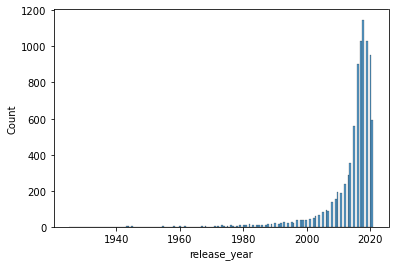

In [195]:
sns.histplot(df['release_year'])

<AxesSubplot:xlabel='release_year', ylabel='Density'>

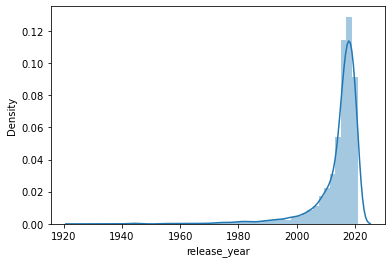

In [167]:
sns.distplot(df['release_year'])

> Most number of shows in Netflix are released between year __2000 & 2020__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2021'),
  Text(1, 0, '2020'),
  Text(2, 0, '2019'),
  Text(3, 0, '2018'),
  Text(4, 0, '2017'),
  Text(5, 0, '2016'),
  Text(6, 0, '2015'),
  Text(7, 0, '2014'),
  Text(8, 0, '2013'),
  Text(9, 0, '2012'),
  Text(10, 0, '2011'),
  Text(11, 0, '2009'),
  Text(12, 0, '2008'),
  Text(13, 0, '2010')])

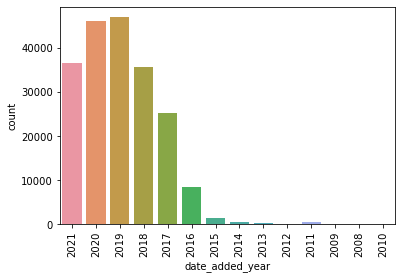

In [196]:
sns.countplot(df_all['date_added_year'])
plt.xticks(rotation=90)

> Most shows are added to Netflix in the year __2020__
>
> Very minimal shows are added to Netflix before 2015

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'September'),
  Text(1, 0, 'August'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'May'),
  Text(5, 0, 'April'),
  Text(6, 0, 'March'),
  Text(7, 0, 'February'),
  Text(8, 0, 'January'),
  Text(9, 0, 'December'),
  Text(10, 0, 'November'),
  Text(11, 0, 'October'),
  Text(12, 0, 'nan')])

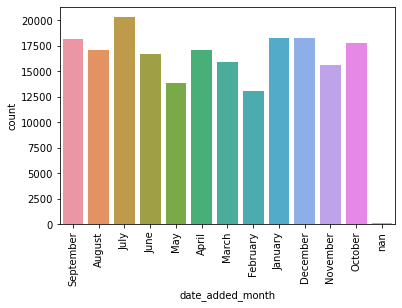

In [164]:
sns.countplot(df_all['date_added_month'])
plt.xticks(rotation=90)

> There is almost equal distribution of movies added throught the year with February being the lowest

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'International TV Shows'),
  Text(2, 0, ' TV Dramas'),
  Text(3, 0, ' TV Mysteries'),
  Text(4, 0, 'Crime TV Shows'),
  Text(5, 0, ' International TV Shows'),
  Text(6, 0, ' TV Action & Adventure'),
  Text(7, 0, 'Docuseries'),
  Text(8, 0, ' Reality TV'),
  Text(9, 0, ' Romantic TV Shows'),
  Text(10, 0, ' TV Comedies'),
  Text(11, 0, 'TV Dramas'),
  Text(12, 0, ' TV Horror'),
  Text(13, 0, 'Children & Family Movies'),
  Text(14, 0, 'Dramas'),
  Text(15, 0, ' Independent Movies'),
  Text(16, 0, ' International Movies'),
  Text(17, 0, 'British TV Shows'),
  Text(18, 0, 'Comedies'),
  Text(19, 0, ' Dramas'),
  Text(2

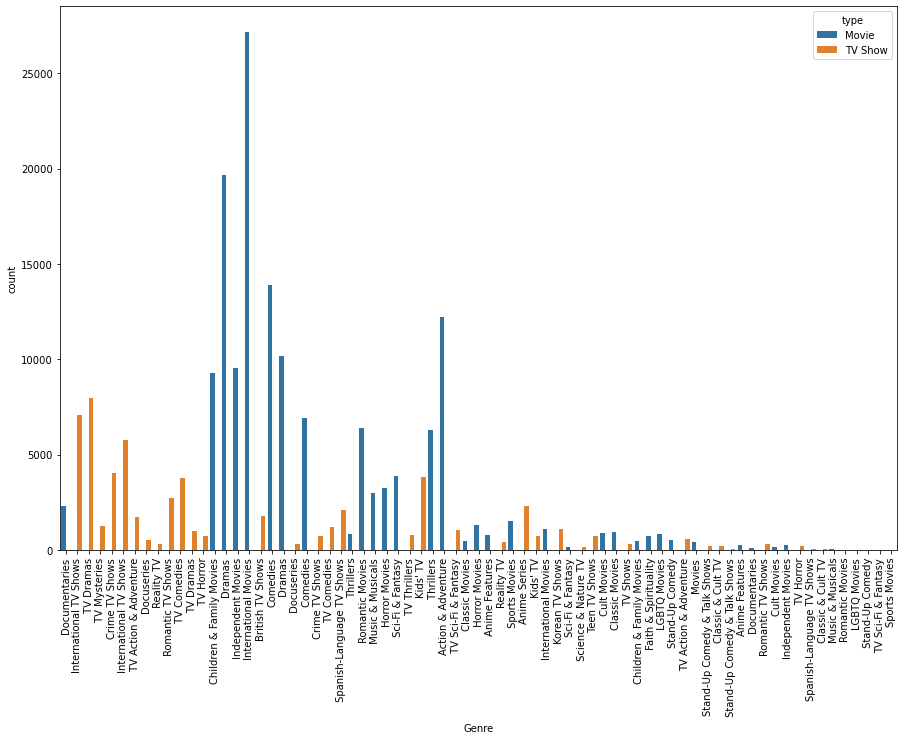

In [174]:
plt.figure(figsize=(15,10))
sns.countplot(df_all['Genre'], hue=df_all['type'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='type', ylabel='release_year'>

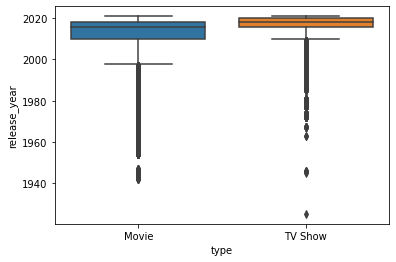

In [175]:
sns.boxplot(df_all['type'], df_all['release_year'])

> Most Tv shows and Movies are released recently

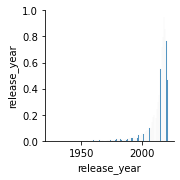

In [177]:
sns.pairplot(df_all)

In [151]:
df_all.head()

,show_id,type,title,date_added,release_year,rating,duration,description,Director,Cast,Genre,Country,date_added_month,date_added_day,date_added_year
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive...",Kirsten Johnson,nan,Documentaries,United States,September,25,2021
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,International TV Shows,South Africa,September,24,2021
58,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,TV Dramas,South Africa,September,24,2021
115,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Ama Qamata,TV Mysteries,South Africa,September,24,2021
172,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi...",nan,Khosi Ngema,International TV Shows,South Africa,September,24,2021


In [68]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swi..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noure...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robb..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice C..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Ar...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but une..."


In [10]:
tv = df[df['type']=='TV Show']
mov = df[df['type']=='Movie']

### show_id

In [11]:
df.show_id.nunique(), df.show_id.count()

(8807, 8807)

In [12]:
tv.show_id.nunique(),tv.show_id.count()

(2676, 2676)

In [13]:
mov.show_id.nunique(), mov.show_id.nunique()

(6131, 6131)

### type

In [14]:
df.type.value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [15]:
df.type.isnull().sum() # no null values

0

<AxesSubplot:xlabel='type', ylabel='count'>

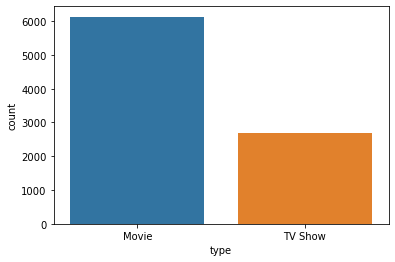

In [16]:
sns.countplot(x='type', data=df)

### title

In [17]:
df.title.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [18]:
df.title.nunique(), df.title.count()

(8807, 8807)

In [19]:
df.iloc[df.title.str.len().argmax()].title

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

In [20]:
df.iloc[df.title.str.len().argmin()].title

'H'

In [21]:
df[df.title.str.len()==1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2069,s2070,TV Show,H,NaN,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,"September 1, 2020",2002,TV-MA,4 Seasons,"International TV Shows, TV Comedies","At a dysfunctional hospital in Paris, three bu..."
5958,s5959,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
7155,s7156,TV Show,K,NaN,"Daisuke Namikawa, Daisuke Ono, Mikako Komatsu,...",Japan,"December 1, 2016",2012,TV-MA,1 Season,"Anime Series, Crime TV Shows, International TV...",A young boy is wanted for a crime he has no re...
7687,s7688,Movie,P,Paul Spurrier,"Suangporn Jaturaphut, Opal, Dor Yodrak, Pisama...","United Kingdom, Thailand","May 31, 2019",2006,TV-MA,105 min,"Horror Movies, International Movies",An orphan girl taught magic by her sick grandm...


### director

In [22]:
df.director.head()

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [23]:
df.director.nunique(), df.director.isnull().sum(), df.director.count()

(4528, 2634, 6173)

In [24]:
df.director.value_counts()

Rajiv Chilaka                   19
Raúl Campos, Jan Suter          18
Suhas Kadav                     16
Marcus Raboy                    16
Jay Karas                       14
                                ..
Saandeep Patel                   1
John Patrick Shanley             1
Reinhard Klooss                  1
Denis Hennelly, Casey Suchan     1
Ah Loong                         1
Name: director, Length: 4528, dtype: int64

In [25]:
df.groupby('director').get_group(name='Rajiv Chilaka')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


### cast

### country

### date_added

### release_year

### rating

### duration

### listed_in

### description

In [84]:
from datetime import datetime

In [ ]:
s = "8 March, 2017"
d = datetime.strptime(s, '%d %B, %Y')
print(d.strftime('%Y-%m-%d'))

In [95]:
def date_conv(x):
    if x=='nan':
        return 'nan'
    else:
        x = str(x).strip()
        return datetime.strptime(str(x), '%B %d, %Y')

In [96]:
df['date_added'].apply(date_conv)

ValueError: time data 'nan' does not match format '%B %d, %Y'

In [88]:
datetime.strptime('September 25, 2021', '%B %d, %Y')

datetime.datetime(2021, 9, 25, 0, 0)

In [92]:
df['date_added'].str.strip().dropna().apply(date_conv)

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [85]:
datetime.strptime(df['date_added'], '%B %d, %Y')

TypeError: strptime() argument 1 must be str, not Series

In [83]:
df['date_added'].str.